In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/bike/bike.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.timestamp.value_counts()

2016-09-13 23:00:00    1
2015-01-31 10:00:00    1
2016-12-01 09:00:00    1
2016-09-23 15:00:00    1
2015-09-10 21:00:00    1
                      ..
2016-12-23 07:00:00    1
2016-12-09 07:00:00    1
2015-09-02 01:00:00    1
2015-09-10 17:00:00    1
2015-04-22 00:00:00    1
Name: timestamp, Length: 17414, dtype: int64

In [5]:
for i in range(0,len(df)):
    df.timestamp[i] = df.timestamp[i][0:7]

# I only want the year and the month of the data to do my time series

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [0]:
df1 = df[['timestamp' , 'cnt']]

# I also only want the timestamp and the count for my time series

In [8]:
df1

,timestamp,cnt
0,2015-01,182
1,2015-01,138
2,2015-01,134
3,2015-01,72
4,2015-01,47
...,...,...
17409,2017-01,1042
17410,2017-01,541
17411,2017-01,337
17412,2017-01,224


In [0]:
a = []
for i in range(1,10):
  for n in range(15,17):
    a.append({"year/month":f"20{n}-0{i}","count":df1.loc[df1['timestamp'] == f'20{n}-0{i}', 'cnt'].sum()})
for i in range(10,13):
  for n in range(15,17):
    a.append({"year/month":f"20{n}-{i}","count":df1.loc[df1['timestamp'] == f'20{n}-{i}', 'cnt'].sum()})

# this forloop of code will sum all the bikes for the given year + month

In [0]:
bikes = pd.DataFrame.from_dict(a)
bikes['year/month'] = pd.to_datetime(bikes['year/month'])
bikes = bikes.sort_values(by=['year/month'])
bikes.index = sorted(bikes['year/month'])
bikes.drop(['year/month'],axis = 1, inplace = True)

# formatting the aforementioned code into a datatime dataframe

In [11]:
bikes

,count
2015-01-01,546639
2015-02-01,543594
2015-03-01,695934
2015-04-01,831582
2015-05-01,895413
2015-06-01,1033252
2015-07-01,1120687
2015-08-01,1033951
2015-09-01,892478
2015-10-01,865046


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


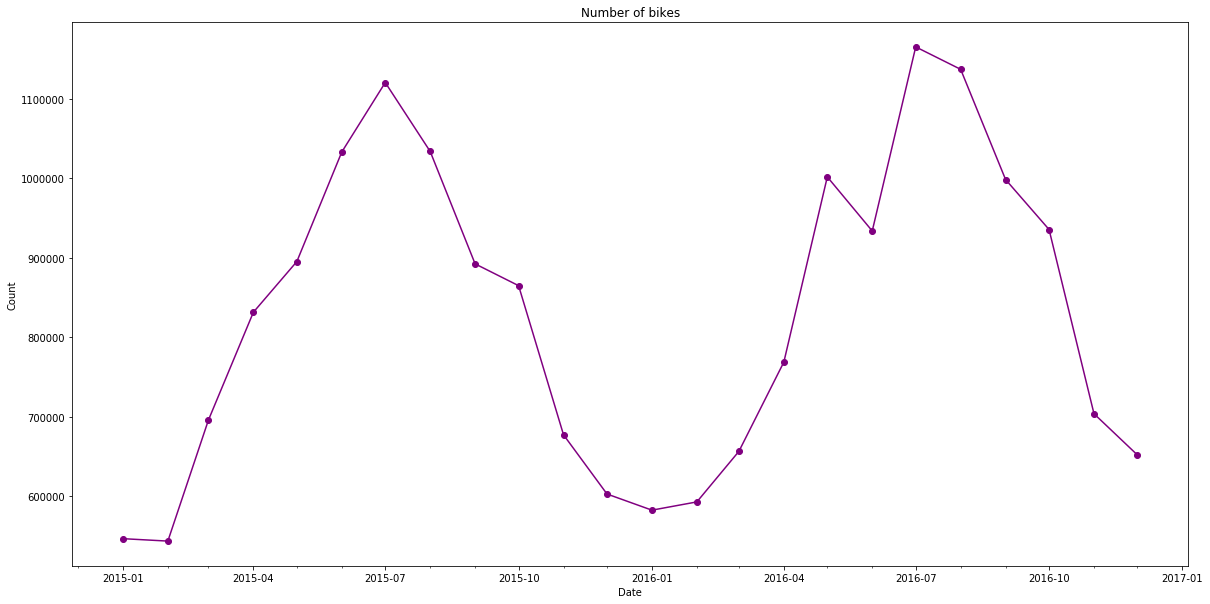

In [12]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 10))


ax.plot(np.array(bikes.index.values),
        np.array(bikes), '-o',
        color = 'purple')


ax.set(xlabel="Date",
       ylabel="Count",
       title="Number of bikes")

ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

#plotting the created dataframe to see any trends and seasonality in the dataframe
# as we can see in the summer time there is a peak in the number of bikes rented
# and as the weather gets colder the number decreases

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

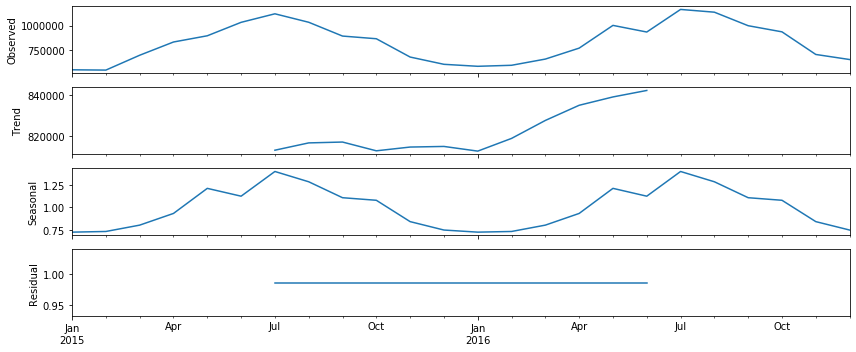

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
result = seasonal_decompose(bikes['count'] , model = 'multiplicative')

rcParams['figure.figsize'] = 12,5

result.plot();

In [0]:
train_data = bikes.iloc[:13]
test_data = bikes.iloc[12:]

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['count'],
                                   trend = 'mul' , 
                                   seasonal = 'mul' , 
                                   seasonal_periods = 12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
test_predictions = fitted_model.forecast(12)

In [18]:
pd.options.display.float_format = '{:.2f}'.format
test_predictions

2016-02-01    587094.94
2016-03-01    765927.84
2016-04-01    935447.22
2016-05-01   1031744.29
2016-06-01   1220530.08
2016-07-01   1357333.77
2016-08-01   1284011.09
2016-09-01   1136886.66
2016-10-01   1130402.54
2016-11-01    905660.15
2016-12-01    812538.36
2017-01-01    779849.73
Freq: MS, dtype: float64

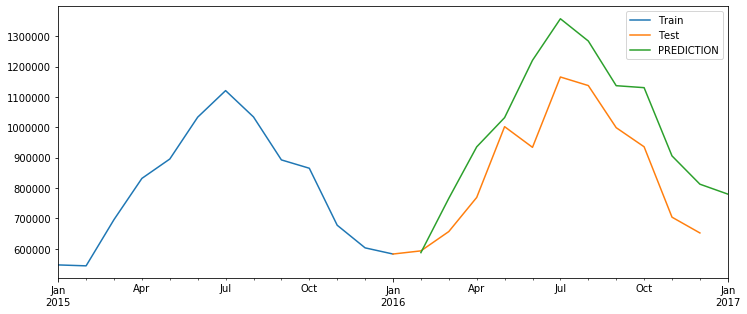

In [19]:
train_data['count'].plot(legend = True , label = 'Train');
test_data['count'].plot(legend = True , label = 'Test');
test_predictions.plot(legend = True , label = 'PREDICTION');

plt.show()

# We can see that my prediction is a bit off from the actual testing data set
# Nevertheless it is still a decent prediction for one year

In [20]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

print(test_data.describe())
print('')
print('mean absolute error:', np.round(mean_absolute_error(test_data , test_predictions),2))
print('root mean squared error:', np.round(mean_squared_error(test_data, test_predictions)**(1/2),2))

# The root mean squared error in comparison to the STD is a pretty good value

           count
count      12.00
mean   844128.83
std    209654.11
min    582518.00
25%    655372.25
50%    851361.50
75%    999448.00
max   1165527.00

mean absolute error: 156568.92
root mean squared error: 196734.99


Our RMSE in comparison to the data is pretty good, it is much lower than the standard deviation.

In [21]:
final_model = ExponentialSmoothing(bikes['count'] , trend = 'mul'
                                  , seasonal = 'mul' , seasonal_periods = 12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
forecast_predictions = final_model.forecast(12)

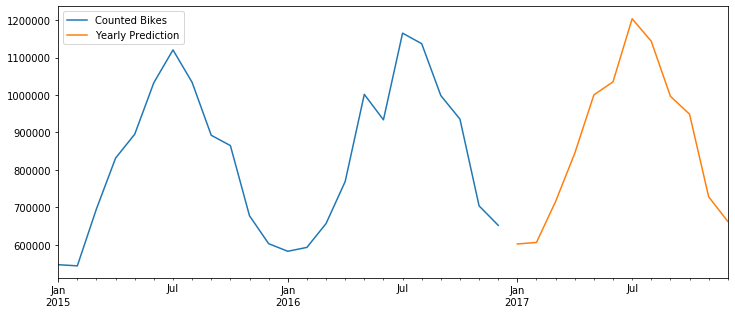

In [23]:
bikes['count'].plot(legend = True, label = 'Counted Bikes');
forecast_predictions.plot(legend = True , label = 'Yearly Prediction');
plt.show()

# We can see that our prediction into the future somewhat replicates the trend
# of the previous two years

# Since we used the holt winters method, let's try using SARIMAX

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#!pip install pmdarima
from pmdarima import auto_arima

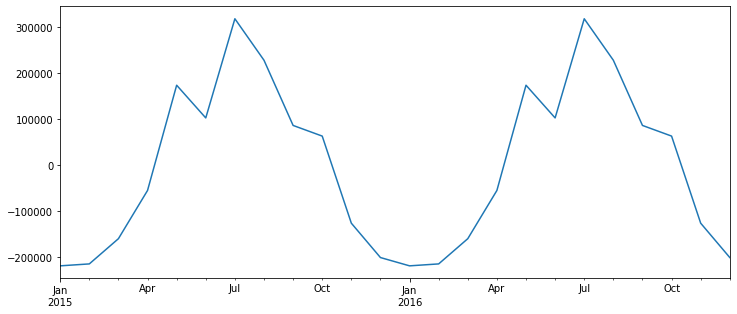

In [25]:
result = seasonal_decompose(bikes['count'] , model = 'add')
result.seasonal.plot();

In [26]:
auto_arima(bikes['count'], seasonal = True , m = 11).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 0, 1, 11); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(5, 0, 1)x(1, 0, 0, 11)   Log Likelihood                -295.811
Date:                            Tue, 29 Oct 2019   AIC                            609.622
Time:                                    18:17:24   BIC                            620.224
Sample:                                         0   HQIC                           612.435
                                             - 24                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.642e+05   1.29e-06   7.48e+11      0.000    9.64e+05    9.64e+05
ar.L1          0.3079      0.411      0.749      0.454      -0.498       1.114
ar.L2          0.4105      0.254      1.614      0.107      -0.088       0.909
ar.L3          0.1630      0.508      0.321      0.748      -0.833       1.159
ar.L4         -0.5310      0.436     -1.219      0.223      -1.385       0.323
ar.L5         -0.3163      0.338     -0.936      0.349      -0.979       0.346
ma.L1         -0.4237      0.630     -0.673      0.501      -1.658       0.810
ar.S.L11      -0.2172      0.443     -0.491      0.624      -1.085       0.651
sigma2      2.731e+09    1.9e-10   1.44e+19      0.000    2.73e+09    2.73e+09
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.34
Prob(Q):                               nan   Prob(JB):                         0.84
Heteroskedasticity (H):               1.38   Skew:                            -0.14
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.17e+35. Standard errors may be unstable.
"""

In [27]:
model = SARIMAX(train_data['count'], order = (5,0,1), seasonal_order=(1, 0, 0, 11))
results = model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              count   No. Observations:                   13
Model:             SARIMAX(5, 0, 1)x(1, 0, 0, 11)   Log Likelihood                -165.535
Date:                            Tue, 29 Oct 2019   AIC                            347.070
Time:                                    18:17:24   BIC                            351.590
Sample:                                01-01-2015   HQIC                           346.141
                                     - 01-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8834      0.471      3.999      0.000       0.960       2.806
ar.L2         -1.0640      0.993     -1.072      0.284      -3.010       0.882
ar.L3          0.5249      1.637      0.321      0.748      -2.683       3.733
ar.L4         -0.9753      1.466     -0.665      0.506      -3.848       1.898
ar.L5          0.6307      0.485      1.301      0.193      -0.320       1.581
ma.L1         -0.7725      1.180     -0.655      0.513      -3.085       1.540
ar.S.L11      -0.0831      3.885     -0.021      0.983      -7.698       7.532
sigma2      4.857e+09   2.14e-10   2.28e+19      0.000    4.86e+09    4.86e+09
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.51
Prob(Q):                               nan   Prob(JB):                         0.78
Heteroskedasticity (H):               0.59   Skew:                            -0.25
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.15e+37. Standard errors may be unstable.
"""

In [0]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

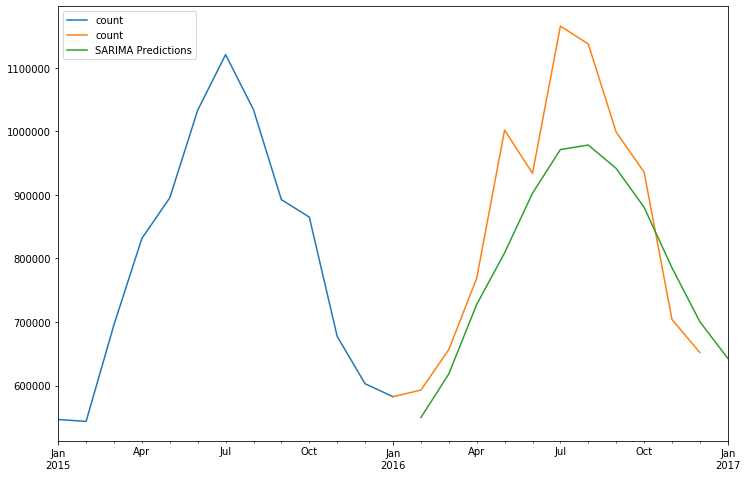

In [35]:
train_data['count'].plot(legend = True)
test_data['count'].plot(legend = True, figsize = (12,8))
predictions.plot(legend = True);

In [0]:
from statsmodels.tools.eval_measures import rmse

In [31]:
error = rmse(test_data['count'] , predictions)
error/100000

1.0394846916542355

In [32]:
test_data['count'].mean()/100000

8.441288333333334

Predicting into the unknown future

In [0]:
fcast = results.predict(len(bikes), len(bikes)+11, typ = 'levels').rename("SARIMA FORECAST")

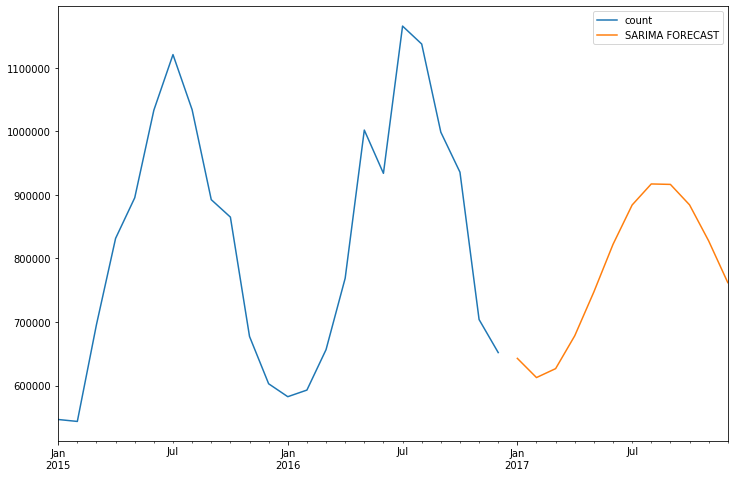

In [34]:
bikes['count'].plot(legend = True, figsize = (12,8))
fcast.plot(legend = True);

Final thoughts: the holt-winters method provided a better result in terms of predicting.